# Homework 6:



In Homework 5, we built a decision tree on the adult dataset.  

This time please use the 

**Random Forest**

**Naïve Bayesian**

**KNN**

to build models to predict whether a person’s income will exceed $50k a year (income is “big”).  

Compare these models in terms of accuracy.



# Here is the accuracy of each models:

**Random Forest** : 0.8201558097132439

**Naïve Bayesian** : Small Income : 0.6195922426653406 Large Income: 0.38040775733465937

**KNN**  :  0.8098789988397149

In [1]:
# Read the CSV File

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
#Preparing data
from sklearn import datasets


income_data= pd.read_csv("Dataset/AdultUCI.csv", sep=',')

In [2]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [3]:
type(income_data)

pandas.core.frame.DataFrame

In [4]:
income_data.shape

(48842, 15)

In [5]:
income_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
income_data.count()

age               48842
workclass         46043
fnlwgt            48842
education         48842
education-num     48842
marital-status    48842
occupation        46033
relationship      48842
race              48842
sex               48842
capital-gain      48842
capital-loss      48842
hours-per-week    48842
native-country    47985
income            32561
dtype: int64

In [7]:
income_data.nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [8]:
income_data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income            16281
dtype: int64

In [9]:
income_data.income.unique()

array(['small', 'large', nan], dtype=object)

In [10]:
income_data = income_data.dropna(subset=['income','workclass','native-country','occupation'])

In [11]:
income_data.income.unique()

array(['small', 'large'], dtype=object)

In [12]:
income_data.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
income                2
dtype: int64

In [13]:
income_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [16]:
from sklearn.model_selection import train_test_split

#native-country column has 41 distinct values so it is not considered in predictors.

predictors =  income_data[['workclass','education','marital-status','occupation','relationship','race','sex']]

target = income_data[['income']]

predictors = pd.get_dummies(predictors.select_dtypes('object'))
target = pd.get_dummies(target.select_dtypes('object'))


In [17]:
predictors.dtypes

workclass_Federal-gov                   uint8
workclass_Local-gov                     uint8
workclass_Private                       uint8
workclass_Self-emp-inc                  uint8
workclass_Self-emp-not-inc              uint8
workclass_State-gov                     uint8
workclass_Without-pay                   uint8
education_10th                          uint8
education_11th                          uint8
education_12th                          uint8
education_1st-4th                       uint8
education_5th-6th                       uint8
education_7th-8th                       uint8
education_9th                           uint8
education_Assoc-acdm                    uint8
education_Assoc-voc                     uint8
education_Bachelors                     uint8
education_Doctorate                     uint8
education_HS-grad                       uint8
education_Masters                       uint8
education_Preschool                     uint8
education_Prof-school             

In [18]:
target.dtypes

income_large    uint8
income_small    uint8
dtype: object

In [19]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, target, test_size=.2)

In [20]:
pred_train.shape

(24129, 57)

In [21]:
pred_train.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
25879,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
18029,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
8641,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19004,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
29571,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
pred_test.shape

(6033, 57)

In [23]:
pred_test.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
20714,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
24336,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
20574,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
25448,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
28934,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [24]:
tar_train.shape

(24129, 2)

In [25]:
tar_train.head()

,income_large,income_small
25879,0,1
18029,0,1
8641,0,1
19004,0,1
29571,0,1


In [26]:
tar_test.shape

(6033, 2)

In [27]:
tar_test.head()

,income_large,income_small
20714,0,1
24336,0,1
20574,0,1
25448,0,1
28934,0,1


In [28]:
#build the random forest model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
rf=classifier.fit(pred_train,tar_train)
rf.predictions=classifier.predict(pred_test)

In [29]:
print(rf.feature_importances_)

[1.13143972e-02 1.22892570e-02 1.99191578e-02 1.37985001e-02
 1.84439249e-02 1.06513782e-02 3.14533896e-04 6.30681450e-03
 8.51573118e-03 3.48025743e-03 2.05335907e-03 3.21593472e-03
 9.79887841e-03 6.54083504e-03 9.41052383e-03 9.21151000e-03
 4.65611044e-02 1.51442951e-02 2.58290718e-02 3.51369545e-02
 3.67129783e-04 2.26532581e-02 1.78496679e-02 1.53389409e-02
 9.44030807e-04 1.36415874e-01 2.90710933e-03 6.73666378e-02
 5.46699607e-03 5.32125404e-03 1.07754375e-02 9.87242450e-05
 1.24326300e-02 5.43016986e-02 1.08546666e-02 7.40241381e-03
 9.61804034e-03 1.98427918e-02 4.55380079e-04 4.57498963e-02
 5.76972413e-03 1.29457749e-02 1.04021527e-02 8.10131184e-03
 8.86655620e-02 1.95117236e-02 5.07191085e-03 1.89596273e-02
 1.06924809e-02 2.18900466e-02 4.45287740e-03 9.14927432e-03
 1.21082580e-02 3.71651785e-03 1.60629696e-02 1.92959883e-02
 1.91048033e-02]


In [32]:
#display the confusion matrix
sklearn.metrics.confusion_matrix(tar_test.values.argmax(axis=1),rf.predictions.argmax(axis=1))

array([[ 827,  676],
       [ 409, 4121]], dtype=int64)

In [33]:
#calculate the accuracy
sklearn.metrics.accuracy_score(tar_test, rf.predictions)

0.8201558097132439

In [34]:
#Checking how many trees will return the best result
trees=range(100)
accuracy=np.zeros(100)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   rf=classifier.fit(pred_train,tar_train)
   rf.predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, rf.predictions)

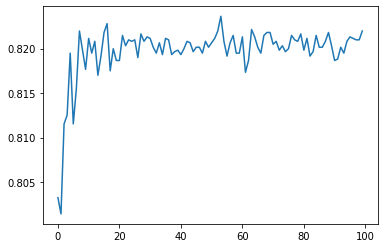

In [35]:
%matplotlib inline
plt.cla()
plt.plot(trees, accuracy)

In [54]:
#Build Naive Bayes model on training data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
gnb = classifier.fit(pred_train,tar_train.income_small)
gnb.predictions=gnb.predict(pred_test)


In [41]:
sklearn.metrics.confusion_matrix(tar_test.income_small,gnb.predictions)

array([[1395,  108],
       [2187, 2343]], dtype=int64)

In [53]:
#Build Naive Bayes model on training data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
gnb = classifier.fit(pred_train,tar_train.income_large)
gnb.predictions=gnb.predict(pred_test)

In [55]:
sklearn.metrics.confusion_matrix(tar_test.income_large,gnb.predictions)

array([[2187, 2343],
       [1395,  108]], dtype=int64)

In [42]:
sklearn.metrics.accuracy_score(tar_test.income_small, gnb.predictions)

0.6195922426653406

In [59]:
sklearn.metrics.accuracy_score(tar_test.income_large, gnb.predictions)

0.38040775733465937

In [50]:
#Build KNN model
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn = classifier.fit(pred_train,tar_train.income_small)
knn.predictions = knn.predict(pred_test)

In [51]:
sklearn.metrics.confusion_matrix(tar_test.income_small,knn.predictions)

array([[ 787,  716],
       [ 446, 4084]], dtype=int64)

In [57]:
#Build KNN model
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn = classifier.fit(pred_train,tar_train.income_large)
knn.predictions = knn.predict(pred_test)

In [58]:
sklearn.metrics.confusion_matrix(tar_test.income_large,knn.predictions)

array([[4084,  446],
       [ 716,  787]], dtype=int64)

In [51]:
sklearn.metrics.accuracy_score(tar_test, knn.predictions)

0.8098789988397149